# Лабораторная работа 4. Правильный многоугольник Рело. Векторизация вычислений в numpy

## Задание 4.1. Правильный многоугольник Рело

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

### Этап 1. Построение треугольника Рело

#### 1. Определение переменных

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

#### 2. Вычисление координат вершин правильного треугольника

In [3]:
l = r # Длина стороны l правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело r

In [4]:
R = l/(2*math.sin(math.pi/n)) # Радиус R окружности, описанной вокруг правильного n-угольника с длиной стороны l

In [5]:
t = np.arange(0,2*np.pi,2*np.pi/n) #углы при вершинах
vertices = center + R*np.transpose([np.cos(t), np.sin(t)]) #список координат вершин треугольника, из полярных в декартовые
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [6]:
t #{0,2π/3,4π/3}

array([0.       , 2.0943951, 4.1887902])

In [7]:
vertices[0,0], vertices[0,:], vertices[:,1]

(5.773502691896258, array([5.77350269, 0.        ]), array([ 0.,  5., -5.]))

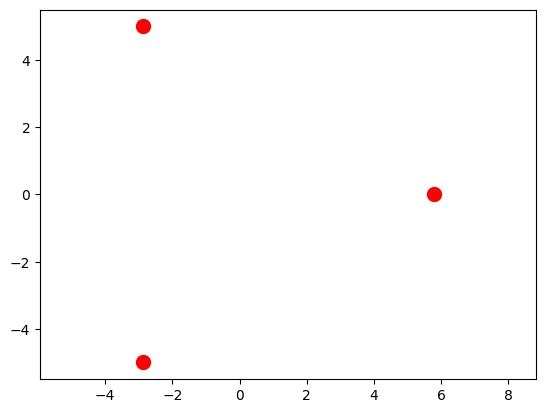

In [8]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

#### 3. Представление одной стороны треугольника Рело

In [9]:
alpha = 2*math.pi/n #центральный угол правильного n-угольника
beta = alpha/2 # центральный угол правильного многоугольника Рело

In [10]:
angle = np.linspace(beta - np.pi, beta + np.pi, N) #создает массив из N элементов, нормально распределенных на пром. [-beta/2, beta/2] 

In [11]:
angle

array([-2.0943951 , -2.03092858, -1.96746207, -1.90399555, -1.84052903,
       -1.77706251, -1.71359599, -1.65012947, -1.58666296, -1.52319644,
       -1.45972992, -1.3962634 , -1.33279688, -1.26933037, -1.20586385,
       -1.14239733, -1.07893081, -1.01546429, -0.95199777, -0.88853126,
       -0.82506474, -0.76159822, -0.6981317 , -0.63466518, -0.57119866,
       -0.50773215, -0.44426563, -0.38079911, -0.31733259, -0.25386607,
       -0.19039955, -0.12693304, -0.06346652,  0.        ,  0.06346652,
        0.12693304,  0.19039955,  0.25386607,  0.31733259,  0.38079911,
        0.44426563,  0.50773215,  0.57119866,  0.63466518,  0.6981317 ,
        0.76159822,  0.82506474,  0.88853126,  0.95199777,  1.01546429,
        1.07893081,  1.14239733,  1.20586385,  1.26933037,  1.33279688,
        1.3962634 ,  1.45972992,  1.52319644,  1.58666296,  1.65012947,
        1.71359599,  1.77706251,  1.84052903,  1.90399555,  1.96746207,
        2.03092858,  2.0943951 ,  2.15786162,  2.22132814,  2.28

In [12]:
#+pi - поворачивает дугу влево от точки
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)]) #матрица с координатами точек первой стороны треугольника Рело

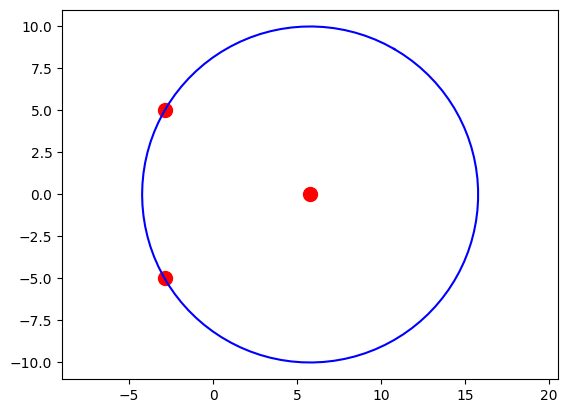

In [13]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [14]:
#добавляем угол альфа, т.к. переходим к след.точке, т.е. сдвигаемся на угол альфа(центральный угол)
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha), np.sin(angle + np.pi + alpha)])

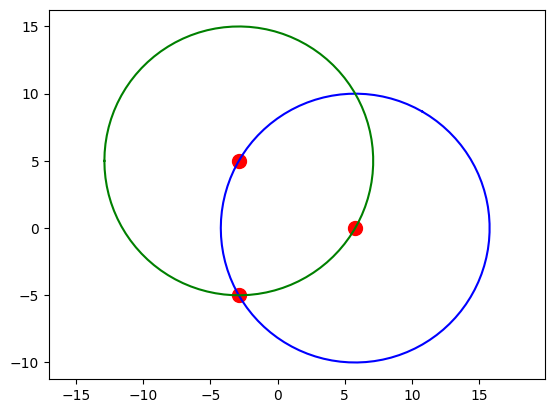

In [15]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

#### 4. Моделирование границы треугольника Рело


In [16]:
list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]

In [17]:
list_sides

[array([[ 1.07735027e+01,  8.66025404e+00],
        [ 1.02141688e+01,  8.95993774e+00],
        [ 9.63695395e+00,  9.22354294e+00],
        [ 9.04418233e+00,  9.45000819e+00],
        [ 8.43824083e+00,  9.63842159e+00],
        [ 7.82156937e+00,  9.78802446e+00],
        [ 7.19665107e+00,  9.89821442e+00],
        [ 6.56600226e+00,  9.96854776e+00],
        [ 5.93216233e+00,  9.99874128e+00],
        [ 5.29768353e+00,  9.98867339e+00],
        [ 4.66512069e+00,  9.93838464e+00],
        [ 4.03702092e+00,  9.84807753e+00],
        [ 3.41591334e+00,  9.71811568e+00],
        [ 2.80429894e+00,  9.54902241e+00],
        [ 2.20464048e+00,  9.34147860e+00],
        [ 1.61935256e+00,  9.09631995e+00],
        [ 1.05079194e+00,  8.81453363e+00],
        [ 5.01248016e-01,  8.49725430e+00],
        [-2.70664038e-02,  8.14575952e+00],
        [-5.32023979e-01,  7.76146464e+00],
        [-1.01159142e+00,  7.34591709e+00],
        [-1.46383769e+00,  6.90079011e+00],
        [-1.88694174e+00,  6.427

In [18]:
sides = np.concatenate(list_sides) #аналог Join, объединяет списки в один(причем можно по разному объединять)

In [19]:
sides

array([[ 1.07735027e+01,  8.66025404e+00],
       [ 1.02141688e+01,  8.95993774e+00],
       [ 9.63695395e+00,  9.22354294e+00],
       [ 9.04418233e+00,  9.45000819e+00],
       [ 8.43824083e+00,  9.63842159e+00],
       [ 7.82156937e+00,  9.78802446e+00],
       [ 7.19665107e+00,  9.89821442e+00],
       [ 6.56600226e+00,  9.96854776e+00],
       [ 5.93216233e+00,  9.99874128e+00],
       [ 5.29768353e+00,  9.98867339e+00],
       [ 4.66512069e+00,  9.93838464e+00],
       [ 4.03702092e+00,  9.84807753e+00],
       [ 3.41591334e+00,  9.71811568e+00],
       [ 2.80429894e+00,  9.54902241e+00],
       [ 2.20464048e+00,  9.34147860e+00],
       [ 1.61935256e+00,  9.09631995e+00],
       [ 1.05079194e+00,  8.81453363e+00],
       [ 5.01248016e-01,  8.49725430e+00],
       [-2.70664038e-02,  8.14575952e+00],
       [-5.32023979e-01,  7.76146464e+00],
       [-1.01159142e+00,  7.34591709e+00],
       [-1.46383769e+00,  6.90079011e+00],
       [-1.88694174e+00,  6.42787610e+00],
       [-2.

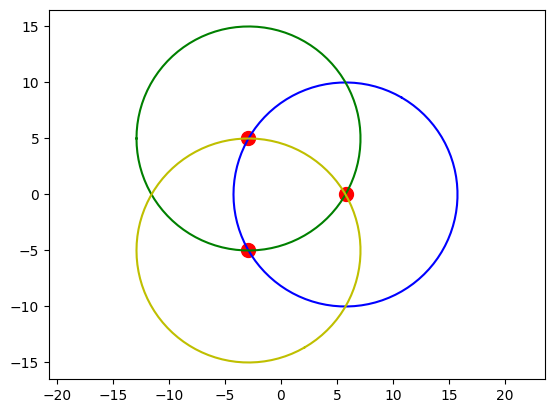

In [20]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(list_sides[0][:,0],list_sides[0][:,1],'b-',markersize=20)
plt.plot(list_sides[1][:,0],list_sides[1][:,1],'g-',markersize=20)
plt.plot(list_sides[2][:,0],list_sides[2][:,1],'y-',markersize=20)
plt.axis('equal');

### Этап 2. Построение правильного многоугольника Рело

r - ширина Рело, l - длинна стороны правильного многоугольника

$$l^2 = r^2 + r^2 -2rr\cos(\beta)$$
$$\beta = \frac{\alpha}{2} = \frac{\pi}{n}$$
$$l = r\sqrt{(2(1-\cos\beta))}$$

### Этап 3. Результирующая пользовательская функция

In [21]:
type(np.array([1,2]))

numpy.ndarray

In [22]:
def regular_polygon_Relo(n=5, center= np.array([0,0]), r = 10, N = 100, col_line = 'b', col_point = 'r'):
    """Покоординатное описание треугольника Рело
         Args:
            n: количество столбцов
            center: координаты центра треугольника Рело в виде numpy array
            r: ширина треугольника Рело
            N: количество точек для представления одной стороны треугольника
            col_line: цвет сторон, по умолчанию синий
            col_point: цвет вершин, по умолчанию красный
        Returns:  
            None.
"""
        
    assert n>0 and type(n) == int and n%2 != 0, 'number of sides should be a positive integer odd number'
    #assert type(center) == numpy.ndarray and len(center) == 2, 'center should be a numpy array with 2 elements - coordinates'
    assert r>0,'radius r should be a positive number'
    assert N>0 and type(n) == int, 'N should be a positive integer number'
    l = r*math.sqrt(2*(1-math.cos(np.pi/n)))
    R = l/(2*math.sin(math.pi/n)) 
    
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    alpha = 2*math.pi/n 
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]
    sides = np.concatenate(list_sides)


    plt.plot(vertices[:,0],vertices[:,1],col_point+'.',markersize=20)
    for i in range(n):
        plt.plot(list_sides[i][:,0],list_sides[i][:,1], col_line+'-',markersize=20)
    plt.axis('equal');

In [27]:
'red'+'-'

'red-'

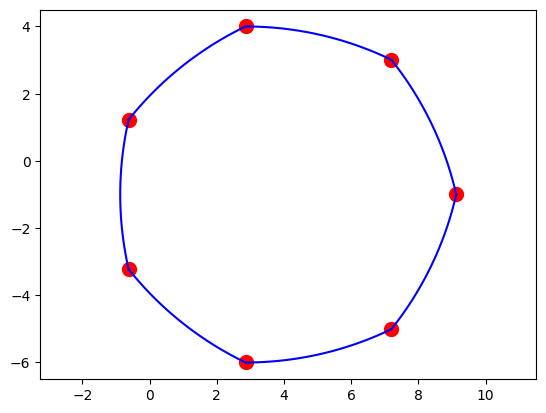

In [28]:
regular_polygon_Relo(7, np.array([4,-1]), 10, 100)

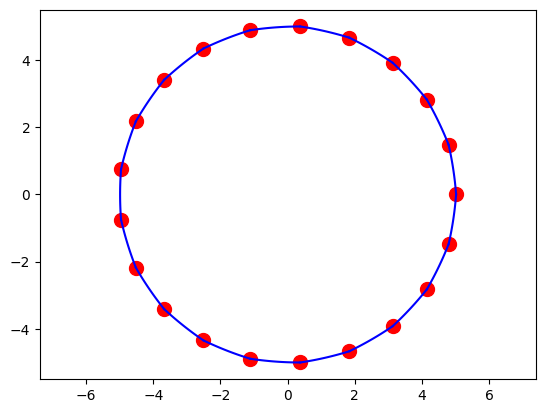

In [29]:
regular_polygon_Relo(21, np.array([0,0]), 10, 100)

In [30]:
regular_polygon_Relo(4, np.array([0,0]), 10, 100) #не работает для четного количества сторон

AssertionError: number of sides should be a positive integer odd number

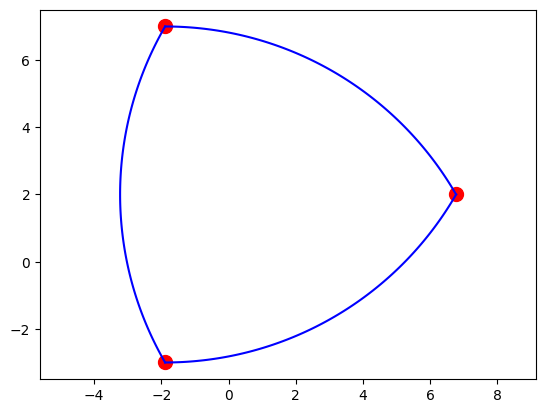

In [31]:
regular_polygon_Relo(3, [1,2], 10, 100)

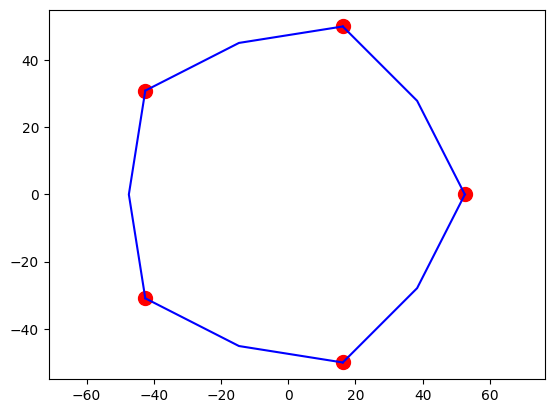

In [32]:
regular_polygon_Relo(5, np.array([0,0]), 100, 3) #плохая прорисовка

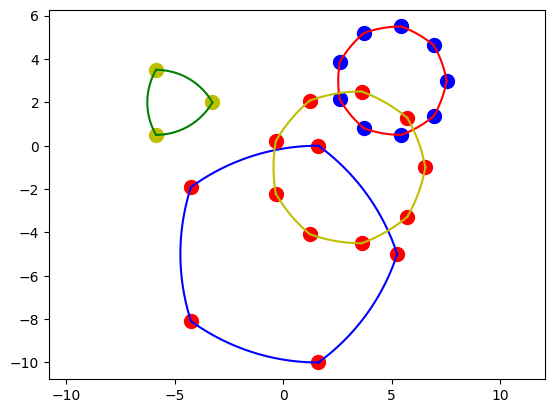

In [33]:
regular_polygon_Relo(3, [-5,2], 3, 100, 'g', 'y')
regular_polygon_Relo(5, [0,-5], 10, 100)
regular_polygon_Relo(9, [5,3], 5, 100, 'r', 'b')
regular_polygon_Relo(9, [3,-1], 7, 100, 'y', 'r')

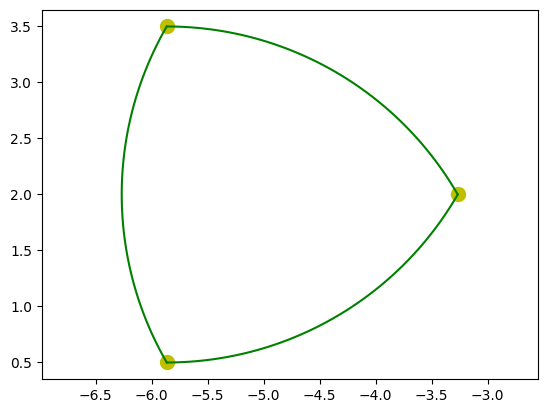

In [34]:
regular_polygon_Relo(n=3, center = [-5,2], r = 3, N = 100, col_line = 'g', col_point ='y')

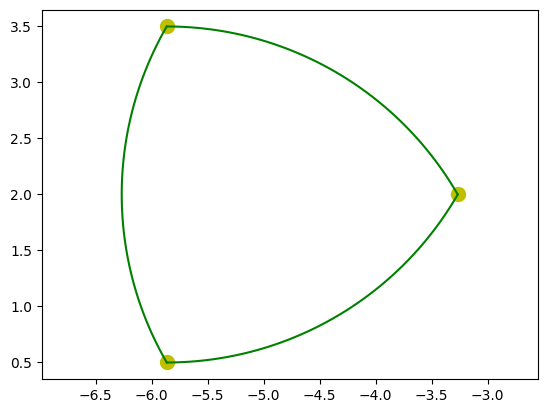

In [35]:
regular_polygon_Relo(3,[-5,2], 3, N = 100, col_line = 'g', col_point ='y')

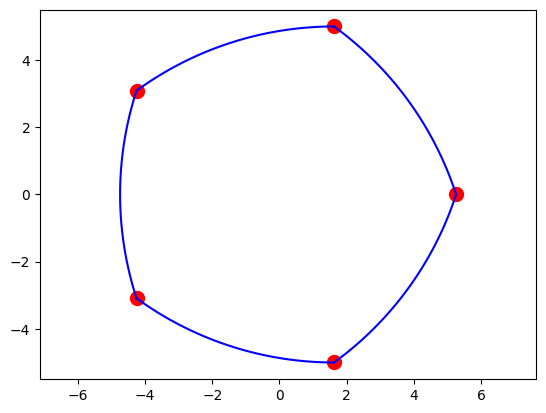

In [36]:
regular_polygon_Relo()

In [37]:
import relo1

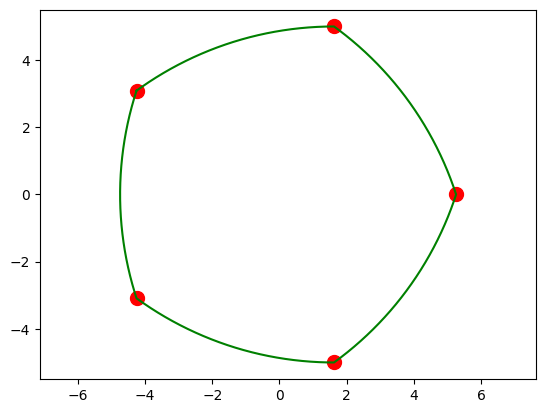

In [38]:
relo1.regular_polygon_Relo(5, np.array([0,0]), 10, 100, 'g', 'r')

In [39]:
#анти биссектрисса треугольника нарисовать + круги чтобы были рело

## ДОП1 - КРУГИ

In [15]:
def regular_polygon_Relo_circ(n=5, center= np.array([0,0]), r = 10, N = 100, col_line = 'b', col_point = 'r'):
    """Покоординатное описание треугольника Рело
         Args:
            n: количество столбцов
            center: координаты центра треугольника Рело в виде numpy array
            r: ширина треугольника Рело
            N: количество точек для представления одной стороны треугольника
            col_line: цвет сторон, по умолчанию синий
            col_point: цвет вершин, по умолчанию красный
        Returns:  
            None.
"""
        
    assert n>0 and type(n) == int and n%2 != 0, 'number of sides should be a positive integer odd number'
    #assert type(center) == numpy.ndarray and len(center) == 2, 'center should be a numpy array with 2 elements - coordinates'
    assert r>0,'radius r should be a positive number'
    assert N>0 and type(n) == int, 'N should be a positive integer number'
    l = r*math.sqrt(2*(1-math.cos(np.pi/n)))
    R = l/(2*math.sin(math.pi/n)) 
    
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    alpha = 2*math.pi/n 
    beta = alpha/2
    #angle - 360градоусов, list sides - список из кругов, относительно всех вершин
    angle = np.linspace(beta - np.pi, beta+np.pi, N) 
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]
    #angle_certain - список углов относительно определенный вершины, list_sides_certain - дуги всех вершин, sides - объединяем
    angle_certain = np.linspace(-beta/2, beta/2, N)
    list_sides_certain = [vertices[i] + r*np.transpose([np.cos(angle_certain + np.pi + i*alpha), np.sin(angle_certain + np.pi + i*alpha)]) for i in range(n)]
    sides = np.concatenate(list_sides_certain)


    plt.plot(vertices[:,0],vertices[:,1],col_point+'.',markersize=20)
    for i in range(n): #ПОСЛЕДОВАТЕЛЬНО РИСУЕМ КРУГИ
        plt.plot(list_sides[i][:,0],list_sides[i][:,1], 'k-',markersize=20)
    plt.plot(sides[:,0],sides[:,1], col_line+'-',markersize=20)
    plt.axis('equal');

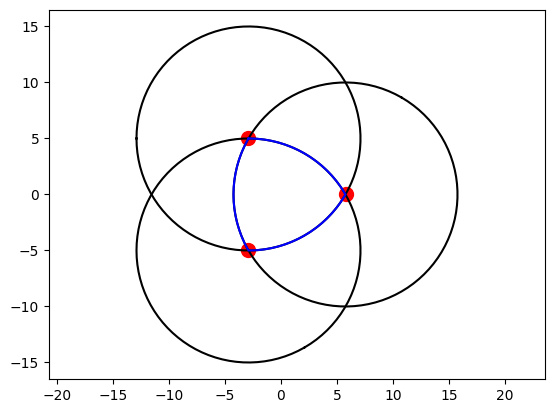

In [16]:
regular_polygon_Relo_circ(n=3, center = [0,0], r = 10, N = 100, col_line = 'b')

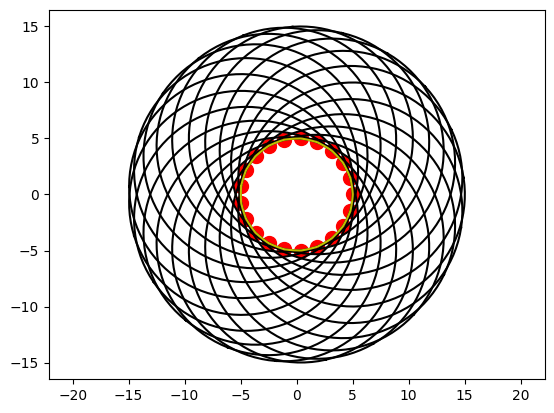

In [17]:
regular_polygon_Relo_circ(n=21, center = [0,0], r = 10, N = 100, col_line = 'y')

## ДОП2 - антибиссеткрисса

In [18]:
trig = np.array([[1,1],[2,1],[1,2],[1,1]])

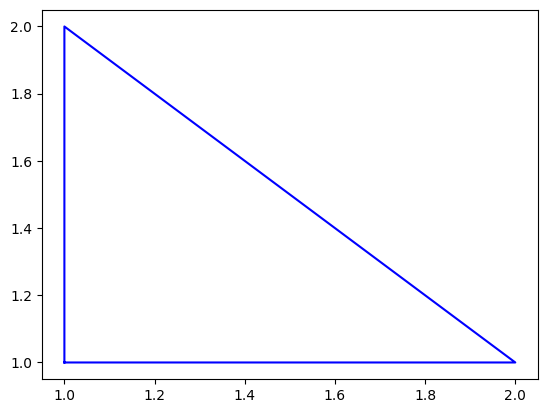

In [19]:
plt.plot(trig[:,0],trig[:,1],'b-',markersize=20)

$$k = \frac{a}{b} = \frac{m}{n}, c = m + n$$
$$M = \frac{m_1+ k m_2}{k+1}$$

In [20]:
def antibisector(trig: list, vertex: int, text=True):
    trig = np.array(trig + [trig[0]])    #чтобы рисовало треугольник полностью, в том числе соед. последнюю и первую вершины
    #длинны сторон через т.пифагогра
    a_len = np.sqrt((trig[1][0]-trig[0][0])**2 + (trig[1][1]-trig[0][1])**2)
    c_len = np.sqrt((trig[2][0]-trig[1][0])**2 + (trig[2][1]-trig[1][1])**2)
    b_len = np.sqrt((trig[2][0]-trig[0][0])**2 + (trig[2][1]-trig[0][1])**2)
    #выбор вершины, от которой идет абисс.
    if vertex == 1:
        k = a_len/b_len #коэфф k - отношение a к b
        point = np.array((trig[2]+k*trig[1])/(1+k)) #координаты точки пересечения по формуле
        line = np.array([trig[0],point]) #координаты антибиссектрисы
        m_len = np.sqrt((trig[2][0]-point[0])**2 + (trig[2][1]-point[1])**2) #длинна m
        n_len = c_len-m_len #длинна n
        #рисуем стороны
        plt.plot([trig[0][0],trig[1][0]],[trig[0][1],trig[1][1]],color = "#fefe00",markersize=20,label=f'a = {round(a_len,2)}')
        plt.plot([trig[2][0],point[0]],[trig[2][1],point[1]],color = "#fec200",markersize=20,label=f'm = {round(m_len,2)}')
        plt.plot([trig[0][0],trig[2][0]],[trig[0][1],trig[2][1]],color = "#0400fb",markersize=20,label=f'b = {round(b_len,2)}')
        plt.plot([trig[1][0],point[0]],[trig[1][1],point[1]],color = "#0493fb",markersize=20,label=f'n = {round(n_len,2)}')
        
    elif vertex == 2:
        k = c_len/a_len
        point = np.array((trig[0]+k*trig[2])/(1+k))
        line = np.array([trig[1],point])
        m_len = np.sqrt((trig[2][0]-point[0])**2 + (trig[2][1]-point[1])**2)
        n_len = c_len-m_len
        plt.plot([trig[1][0],trig[2][0]],[trig[1][1],trig[2][1]],color = "#fefe00",markersize=20)
        plt.plot([trig[0][0],point[0]],[trig[0][1],point[1]],color = "#fec200",markersize=20)
        plt.plot([trig[1][0],trig[0][0]],[trig[1][1],trig[0][1]],color = "#0400fb",markersize=20)
        plt.plot([trig[2][0],point[0]],[trig[2][1],point[1]],color = "#0493fb",markersize=20)
    elif vertex == 3:
        k = b_len/c_len
        point = np.array((trig[1]+k*trig[0])/(1+k))
        line = np.array([trig[2],point])
        plt.plot([trig[0][0],trig[2][0]],[trig[0][1],trig[2][1]],color = "#fefe00",markersize=20)
        plt.plot([trig[1][0],point[0]],[trig[1][1],point[1]],color = "#fec200",markersize=20)
        plt.plot([trig[1][0],trig[2][0]],[trig[1][1],trig[2][1]],color = "#0400fb",markersize=20)
        plt.plot([trig[0][0],point[0]],[trig[0][1],point[1]],color = "#0493fb",markersize=20)
    plt.scatter([point[0]],[point[1]],50, 'r',label='точка пересечения')
    plt.plot(line[:,0],line[:,1],'k',label='антибиссектрисса')
    plt.legend()
    

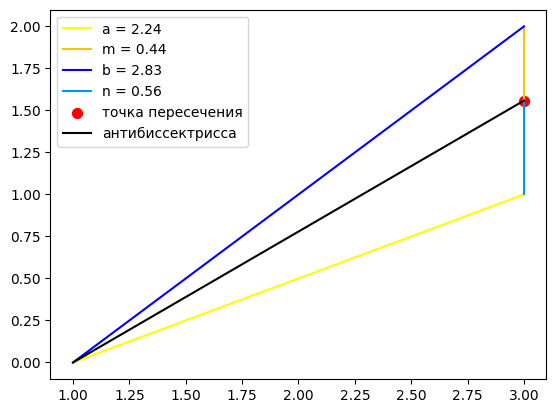

In [21]:
antibisector([[1,0],[3,1],[3,2]], 1)
#antibisector([[1,0],[3,1],[3,2]], 2)
#antibisector([[1,0],[3,1],[3,2]], 3)

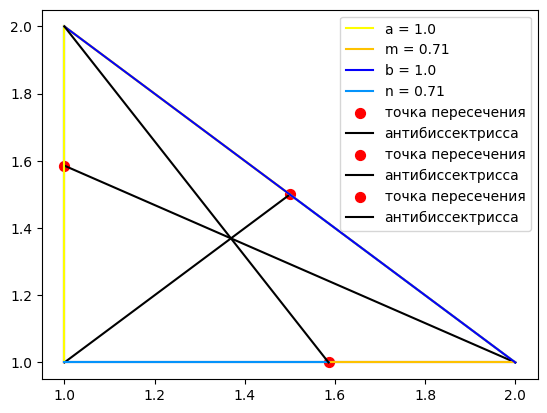

In [22]:
antibisector([[1,1],[2,1],[1,2]], 1)
antibisector([[1,1],[2,1],[1,2]], 2)
antibisector([[1,1],[2,1],[1,2]], 3)